✅ Parsed 8 input vectors (latest batch only).
✅ Parsed 8 outputs (latest batch only).

=== Function 1 (2D) ===
  Data size: 16, Output range: [-0.0036, 64.0000]


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


  🔍 Best hyperparameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': np.float64(0.0009932308858067883), 'mlpregressor__hidden_layer_sizes': (64,), 'mlpregressor__learning_rate_init': np.float64(0.0003322520635999886)}


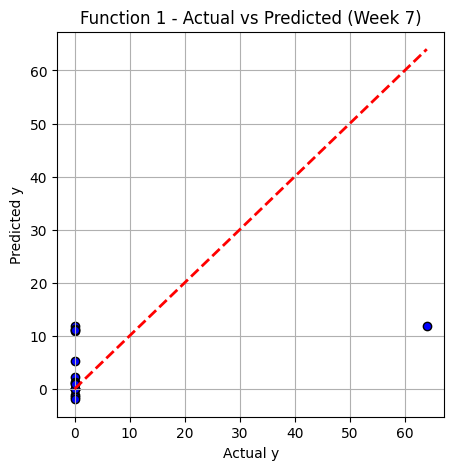

  Best predicted output: 11.8518
  Query to submit: 0.118049-0.564769

=== Function 2 (2D) ===
  Data size: 16, Output range: [-0.0656, 3.1124]
  🔍 Best hyperparameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': np.float64(0.0009932308858067883), 'mlpregressor__hidden_layer_sizes': (64,), 'mlpregressor__learning_rate_init': np.float64(0.0003322520635999886)}


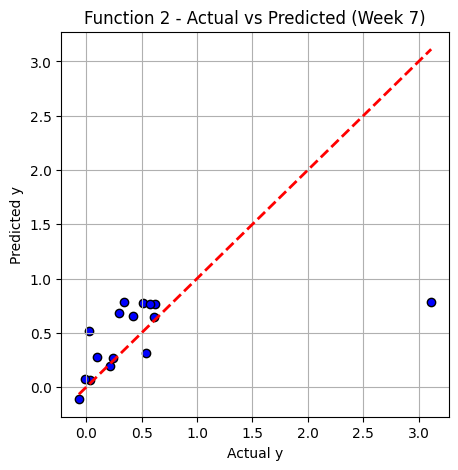

  Best predicted output: 0.7698
  Query to submit: 0.731167-0.730658

=== Function 3 (3D) ===
  Data size: 21, Output range: [-0.3989, 71.0000]
  🔍 Best hyperparameters: {'mlpregressor__activation': 'tanh', 'mlpregressor__alpha': np.float64(5.666566321361543e-05), 'mlpregressor__hidden_layer_sizes': (256, 128, 64), 'mlpregressor__learning_rate_init': np.float64(0.0019318092164684587)}


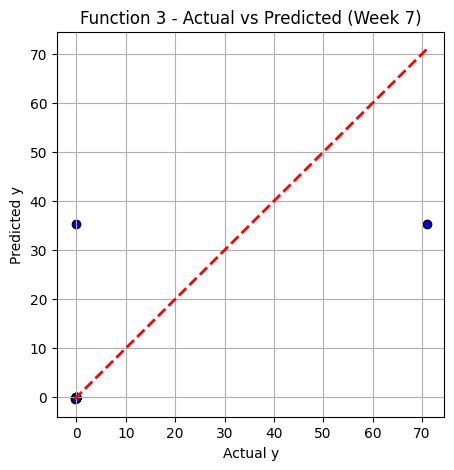

  Best predicted output: 35.4241
  Query to submit: 0.173933-0.705493-0.957471

=== Function 4 (4D) ===
  Data size: 36, Output range: [-32.6257, 64.0000]
  🔍 Best hyperparameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': np.float64(0.000606850157946487), 'mlpregressor__hidden_layer_sizes': (128,), 'mlpregressor__learning_rate_init': np.float64(0.0008799726016810133)}


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


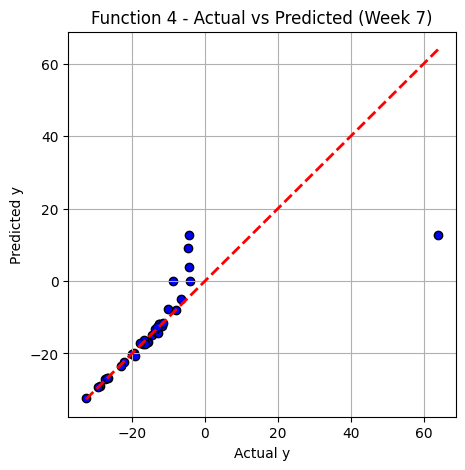

  Best predicted output: 9.5912
  Query to submit: 0.283608-0.325148-0.335689-0.318342

=== Function 5 (4D) ===
  Data size: 26, Output range: [0.1129, 3042.5479]
  🔍 Best hyperparameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': np.float64(0.0009932308858067883), 'mlpregressor__hidden_layer_sizes': (64,), 'mlpregressor__learning_rate_init': np.float64(0.0003322520635999886)}


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


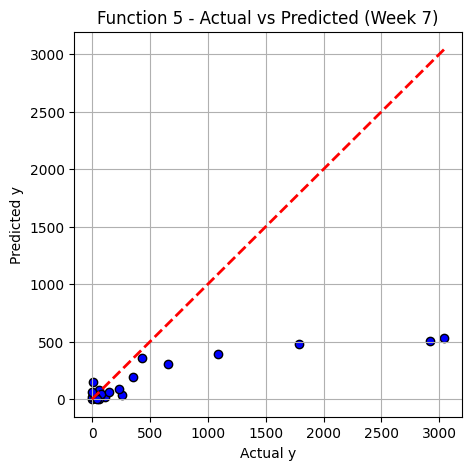

  Best predicted output: 517.3895
  Query to submit: 0.002126-0.983671-0.972258-0.867315

=== Function 6 (5D) ===
  Data size: 26, Output range: [-2.5712, 64.0000]


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


  🔍 Best hyperparameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': np.float64(0.0009932308858067883), 'mlpregressor__hidden_layer_sizes': (64,), 'mlpregressor__learning_rate_init': np.float64(0.0003322520635999886)}


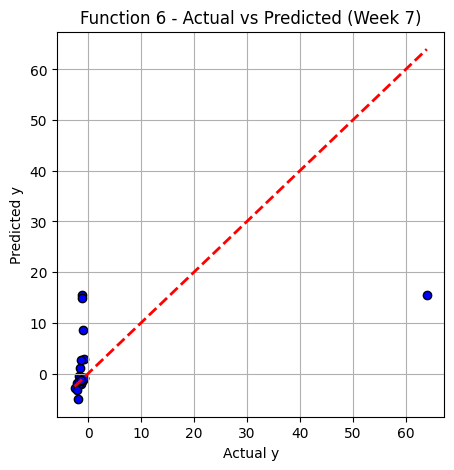

  Best predicted output: 14.4615
  Query to submit: 0.448909-0.011704-0.001828-0.568423-0.170223

=== Function 7 (6D) ===
  Data size: 36, Output range: [-0.0787, 2.0091]
  🔍 Best hyperparameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': np.float64(0.000606850157946487), 'mlpregressor__hidden_layer_sizes': (128,), 'mlpregressor__learning_rate_init': np.float64(0.0008799726016810133)}


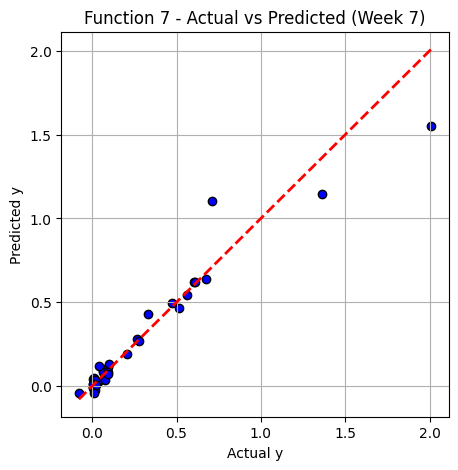

  Best predicted output: 1.5067
  Query to submit: 0.108699-0.268864-0.315232-0.185149-0.407486-0.921928

=== Function 8 (8D) ===
  Data size: 46, Output range: [5.5922, 64.0000]
  🔍 Best hyperparameters: {'mlpregressor__activation': 'tanh', 'mlpregressor__alpha': np.float64(3.3062425041415756e-05), 'mlpregressor__hidden_layer_sizes': (128, 64), 'mlpregressor__learning_rate_init': np.float64(0.0031592644736118973)}


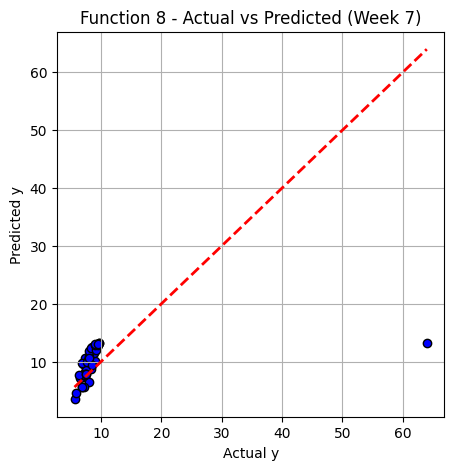

  Best predicted output: 13.2671
  Query to submit: 0.026168-0.264116-0.048259-0.090959-0.958554-0.830609-0.224689-0.863215

💾 Saved all week7 queries to week7_queries.txt

✅ DONE — Week 7 (Hyperparameter Tuning) complete.


In [1]:
import numpy as np
import os
import re
import ast
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt

# =========================
# CONFIGURATION
# =========================
base_path = "data/"
inputs_txt = "week6/inputs.txt"       # file dari email (hasil minggu sebelumnya)
outputs_txt = "week6/outputs.txt"
n_candidates = 4000
save_queries = True

# =========================
# LOAD INPUTS (ambil batch terakhir)
# =========================
def load_inputs(path):
    with open(path, "r") as f:
        text = f.read().strip()
    batches = re.split(r"\]\s*\n\s*\[", text)
    last_batch = "[" + batches[-1].strip().lstrip("[").rstrip("]") + "]"
    last_batch = re.sub(r'array\(', '', last_batch).replace(')', '')
    chunks = re.findall(r'\[([^\[\]]+)\]', last_batch)

    vectors = []
    for ch in chunks:
        nums = [float(x) for x in ch.split(",") if x.strip()]
        vectors.append(np.array(nums))
    print(f"✅ Parsed {len(vectors)} input vectors (latest batch only).")
    return vectors

# =========================
# LOAD OUTPUTS (ambil batch terakhir)
# =========================
def load_outputs(path):
    with open(path, "r") as f:
        text = f.read().strip()
    batches = re.split(r"\]\s*\n\s*\[", text)
    last_batch = batches[-1].strip()
    last_batch = last_batch.replace("np.float64(", "").replace(")", "")
    last_batch = last_batch.replace("[", "").replace("]", "")
    last_batch = re.sub(r"[^\deE\-\.\,\s]", "", last_batch)
    numbers = re.findall(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", last_batch)
    outputs = np.array([float(x) for x in numbers], dtype=float)
    print(f"✅ Parsed {len(outputs)} outputs (latest batch only).")
    return outputs

# =========================
# LOAD DATA FROM EMAIL
# =========================
new_inputs = load_inputs(inputs_txt)
new_outputs = load_outputs(outputs_txt)

# =========================
# MODEL TRAINING (WEEK 7)
# =========================
queries_out = []
for i in range(1, 9):
    folder = os.path.join(base_path, f"function_{i}")
    input_file = os.path.join(folder, "week6_inputs.npy")
    output_file = os.path.join(folder, "week6_outputs.npy")

    # Gabungkan data lama + batch baru
    X_prev = np.load(input_file)
    y_prev = np.load(output_file)
    X_combined = np.vstack([X_prev, new_inputs[i-1].reshape(1, -1)])
    y_combined = np.append(y_prev, new_outputs[i-1])

    np.save(os.path.join(folder, "week7_inputs.npy"), X_combined)
    np.save(os.path.join(folder, "week7_outputs.npy"), y_combined)

    dim = X_combined.shape[1]
    print(f"\n=== Function {i} ({dim}D) ===")
    print(f"  Data size: {len(X_combined)}, Output range: [{y_combined.min():.4f}, {y_combined.max():.4f}]")

    # =========================
    # HYPERPARAMETER TUNING (Randomized Search)
    # =========================
    base_model = MLPRegressor(max_iter=3000, random_state=42)
    pipeline = make_pipeline(StandardScaler(), base_model)

    param_dist = {
        "mlpregressor__hidden_layer_sizes": [(64,), (128,), (128, 64), (256, 128, 64)],
        "mlpregressor__activation": ["relu", "tanh"],
        "mlpregressor__alpha": uniform(1e-5, 1e-3),
        "mlpregressor__learning_rate_init": uniform(1e-4, 5e-3)
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=10,
        random_state=42,
        cv=3,
        verbose=0,
        n_jobs=-1
    )

    search.fit(X_combined, y_combined)
    best_model = search.best_estimator_
    print(f"  🔍 Best hyperparameters: {search.best_params_}")

    # === Visualisasi performance ===
    y_pred_train = best_model.predict(X_combined)
    plt.figure(figsize=(5, 5))
    plt.scatter(y_combined, y_pred_train, c='blue', edgecolor='k')
    plt.plot([y_combined.min(), y_combined.max()],
             [y_combined.min(), y_combined.max()],
             'r--', lw=2)
    plt.title(f'Function {i} - Actual vs Predicted (Week 7)')
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.grid(True)
    plt.show()

    # === Candidate search ===
    candidates = np.random.uniform(0, 1, (n_candidates, dim))
    preds = best_model.predict(candidates)
    best_idx = np.argmax(preds)
    best_query = np.clip(candidates[best_idx], 0.0, 1.0)
    query_str = "-".join([f"{x:.6f}" for x in best_query])

    print(f"  Best predicted output: {preds[best_idx]:.4f}")
    print(f"  Query to submit: {query_str}")
    queries_out.append(f"Function {i}: {query_str}")

# =========================
# SAVE WEEK7 QUERIES
# =========================
if save_queries:
    with open("week7_queries.txt", "w") as f:
        f.write("\n".join(queries_out))
    print("\n💾 Saved all week7 queries to week7_queries.txt")

print("\n✅ DONE — Week 7 (Hyperparameter Tuning) complete.")